## Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Import pickle file 

In [2]:
## path
path = r'C:\Users\mgril\OneDrive\Desktop\Instacart Basket Analysis Folder'

In [3]:
## Import pkl file
df_merge_cust_ords = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data', 'df_merge_cust_ords_.pkl'))

### Task 03. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
In a markdown cell beneath your histogram, describe what the histogram demonstrates.

Text(0, 0.5, 'Frequency')

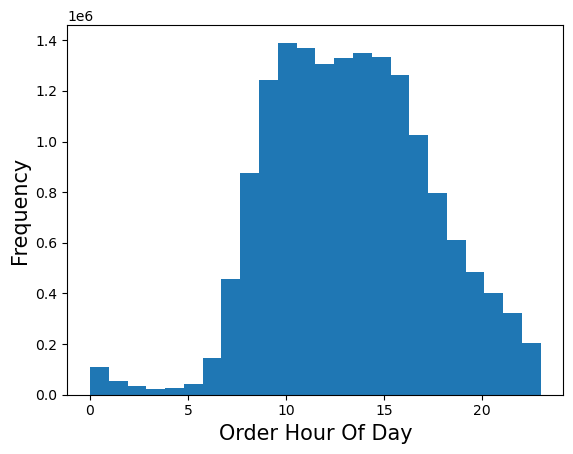

In [4]:
#create histogram
hist = df_merge_cust_ords['order_hour_of_day'].plot.hist(bins = 24) #24hours 
plt.xlabel("Order Hour Of Day", fontsize=15)
plt.ylabel("Frequency",fontsize=15)

### Insight from above - The histogram shows that orders start coming in at a small amount from 7AM, then peaking at 10AM. Orders stay steady until 4pm. Lunchtime indicates busiest time. 

In [6]:
#exporting the visual
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

### Task 04. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

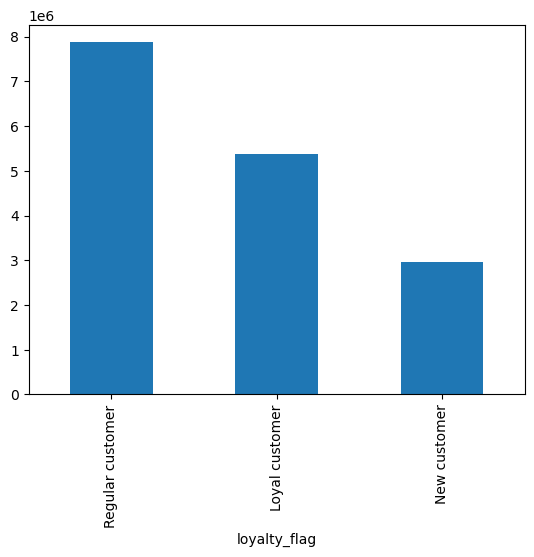

In [8]:
# Bar chart loyalty cust
bar_loyalty_flag = df_merge_cust_ords['loyalty_flag'].value_counts().plot.bar()

#### Regular customers make up most of the customers in instacart

### Task 05. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [10]:
#5 make an accurate subset for making a line chart for prices and order hour of day
np.random.seed(4)
dev = np.random.rand(len(df_merge_cust_ords)) <= 0.7

In [11]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [12]:
# big is 70% of DF and small is 30%
big = df_merge_cust_ords[dev]

In [13]:
# big is 70% of DF and small is 30%
small = df_merge_cust_ords[~dev]

In [14]:
#check count of DF
len(df_merge_cust_ords)

16202429

In [15]:
# check that the big and small data set = the same number 
len(big)+len (small)

16202429

In [16]:
#make the small df only contain 2 columns and renaming df_3
df_3 = small[['order_hour_of_day','prices']]

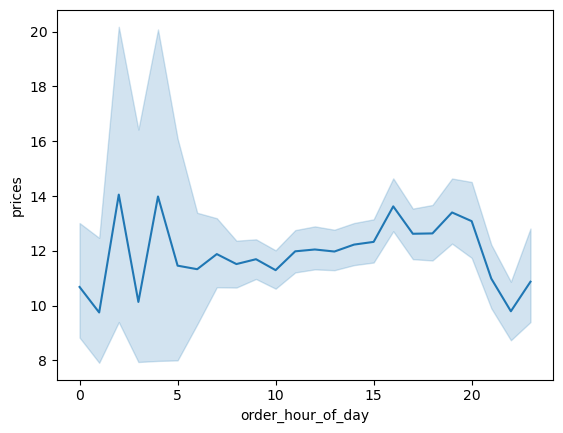

In [17]:
# make a line plot with the small df
line_hour_price = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

####  no real relation seen relating to the price of items purchased and the hour of which they are purchased

In [18]:
# Reviewing column names
df_merge_cust_ords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16202429 entries, 0 to 16202428
Data columns (total 30 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 int64  
 1   first_name              object 
 2   last_name               object 
 3   sex                     object 
 4   state                   object 
 5   age                     int64  
 6   date_joined             object 
 7   dependents              int64  
 8   fam_status              object 
 9   income                  int64  
 10  order_id                int64  
 11  order_number            int64  
 12  orders_day_of_week      int64  
 13  order_hour_of_day       int64  
 14  days_since_prior_order  float64
 15  product_id              int64  
 16  product_name            object 
 17  department_id           int64  
 18  prices                  float64
 19   price_range_loc        object 
 20  price_range_loc         object 
 21  busiest_day             objec

### Task 06. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

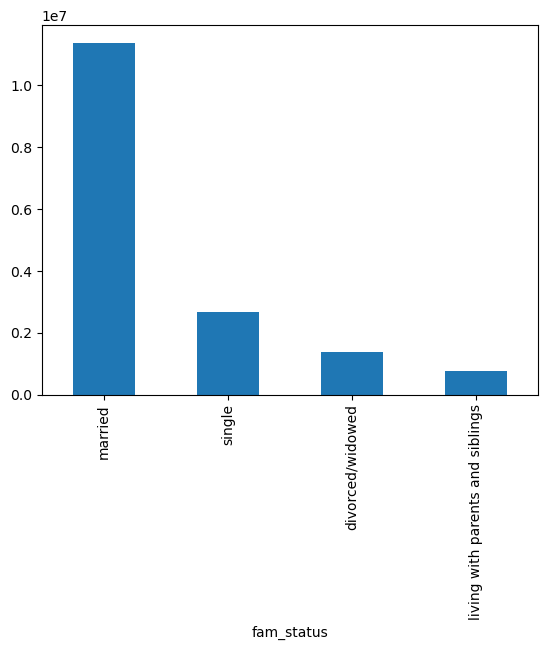

In [20]:
# create bar chart for marital status
bar_marital = df_merge_cust_ords['fam_status'].value_counts().plot.bar()

#### The majority of instacart customers a married people

In [21]:
# making age brackets flags column

df_merge_cust_ords.loc[df_merge_cust_ords['age'] >= 90, 'age_bracket'] = '90+'

In [23]:
df_merge_cust_ords.loc[(df_merge_cust_ords['age'] <= 89) & (df_merge_cust_ords['age'] >= 80), 'age_bracket'] = '80-89'

In [24]:
df_merge_cust_ords.loc[(df_merge_cust_ords['age'] <= 79) & (df_merge_cust_ords['age'] >= 70), 'age_bracket'] = '70-79'

In [25]:
df_merge_cust_ords.loc[(df_merge_cust_ords['age'] <= 69) & (df_merge_cust_ords['age'] >= 60), 'age_bracket'] = '60-69'

In [26]:
df_merge_cust_ords.loc[(df_merge_cust_ords['age'] <= 59) & (df_merge_cust_ords['age'] >= 50), 'age_bracket'] = '50-59'

In [27]:
df_merge_cust_ords.loc[(df_merge_cust_ords['age'] <= 49) & (df_merge_cust_ords['age'] >= 40), 'age_bracket'] = '40-49'

In [28]:
df_merge_cust_ords.loc[(df_merge_cust_ords['age'] <= 39) & (df_merge_cust_ords['age'] >= 30), 'age_bracket'] = '30-39'

In [29]:
df_merge_cust_ords.loc[(df_merge_cust_ords['age'] <= 29) & (df_merge_cust_ords['age'] >= 20), 'age_bracket'] = '20-29'

In [30]:
df_merge_cust_ords.loc[(df_merge_cust_ords['age'] <= 19) & (df_merge_cust_ords['age'] >= 10), 'age_bracket'] = '10-19'

In [31]:
#checking the count for the age brackets of customers
df_merge_cust_ords['age_bracket'].value_counts(dropna = False)

age_bracket
40-49    2555131
30-39    2547435
50-59    2529645
20-29    2529110
70-79    2522982
60-69    2495560
80-89     512500
10-19     510066
Name: count, dtype: int64

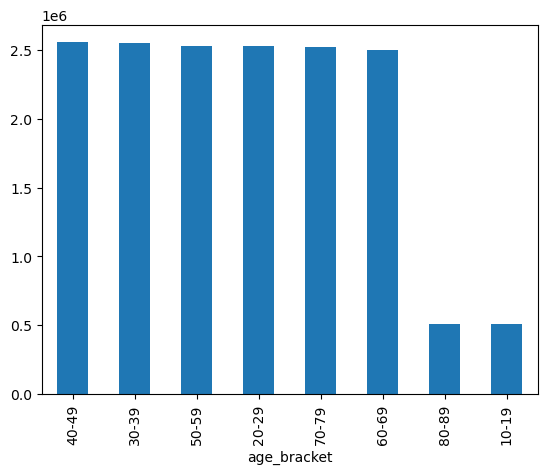

In [32]:
#bar chart on customers age bracket
bar_age_bracket = df_merge_cust_ords['age_bracket'].value_counts().plot.bar()

### Instacart customers are least likely to be in age groups 80-89 & 10-19. The other age groups are steady and equal. 

In [33]:
# Review DF
df_merge_cust_ords.head()

,user_id,first_name,last_name,sex,state,age,date_joined,dependents,fam_status,income,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,age_bracket
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,40-49
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,40-49
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,40-49
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,40-49
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Least busy days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,40-49


In [36]:
#make a new df with just 2 columns in the small subset
df_4 = small[['dependents','age']]

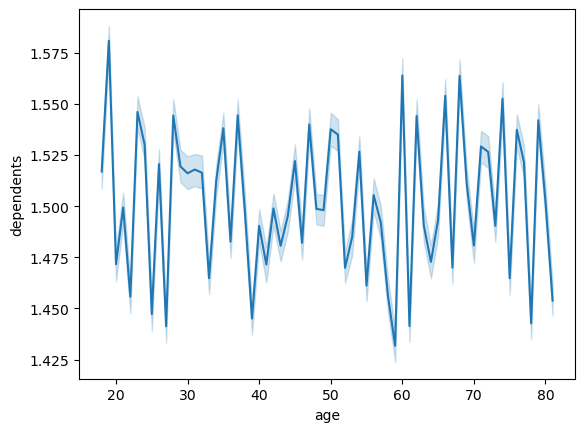

In [38]:
#line chart reviewing insights for age and number of dependants
line_age_dependants = sns.lineplot(data = df_4, x = 'age',y = 'dependents')

#### Review of the chart and see no connection between age and # of dependents

### Task 07. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

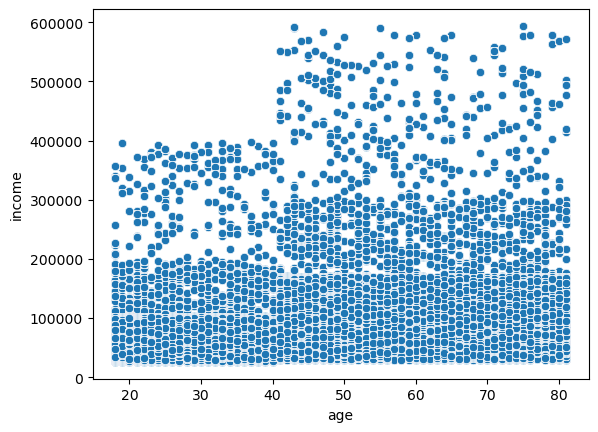

In [39]:
#scatterplot of age and income
scatter_age_income = sns.scatterplot(x = 'age', y = 'income',data = df_merge_cust_ords)

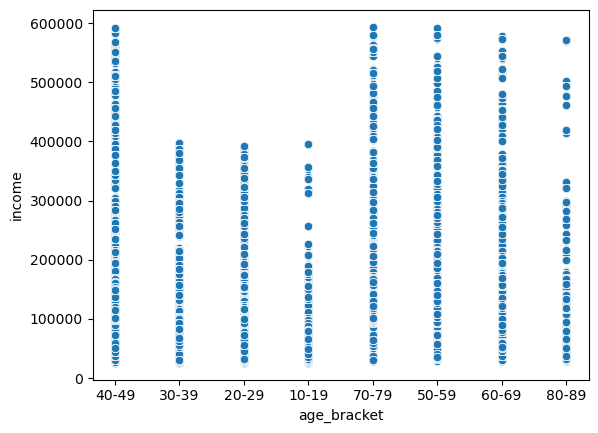

In [40]:
# scatterplot of age and income
scatter_age_bracket_income = sns.scatterplot(x = 'age_bracket', y = 'income',data = df_merge_cust_ords)

#### the scatterplot shows that as the customer hits 40+ they have a higher income available

### Task 08. Export your visualizations as “.png” files in your relevant project folder.

In [43]:
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [44]:
line_hour_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour_price.png'))

In [45]:
bar_marital.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_marital.png'))

In [46]:
bar_age_bracket.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_bracket.png'))

In [47]:
line_age_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

In [48]:
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))